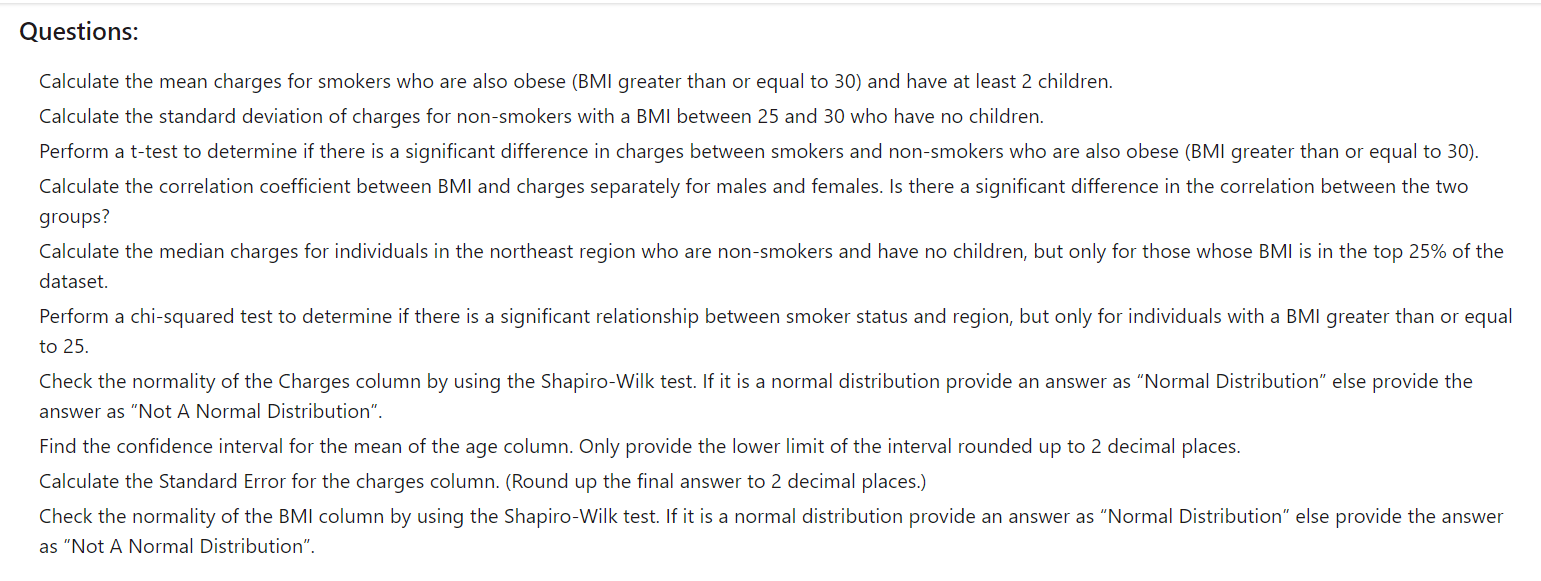

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('datasets\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Q1. Calculate the mean charges for smokers are also obese (BMI greater than or equal to 30) and have atleast 2 children

In [8]:
q1mean = df[(df.children>=2) & (df.bmi>=30) & (df.smoker=='yes')]['charges'].mean()
q1mean

42358.52335166667

### Q2. Calculate the standard deviation of charges for non-smokers with a BMI between 25 and 30 who have no children.

In [9]:
q2std = df[(df.children==0)&(df.smoker=='no')&(df.bmi>=25)&(df.bmi<=30)]['charges'].std()
q2std

5972.719518518404

### Q3. Perform a t-test to determine if there is a significant difference in charges between smokers and non-smokers who are also obese (BMI greater than or equal to 30).

In [10]:
q3smoker = df[(df.smoker=='yes')&(df.bmi>=25)&(df.bmi>=30)]['charges']
q3nonsmoker = df[(df.smoker=='no')&(df.bmi>=25)&(df.bmi>=30)]['charges']

In [11]:
stat,p = st.ttest_ind(q3smoker,q3nonsmoker)

In [12]:
if p <= 0.05:
    print("significant difference")
else:
    print("no significant difference")

significant difference


### Q4. Calculate the correlation coefficient between BMI and charges separately for males and females. Is there a significant difference in the correlation between the two groups?

In [19]:
q4male = df[df.sex=='male']
corr_male = q4male['bmi'].corr(q4male['charges'])
q4female = df[df.sex=='female']
corr_fema = q4female.bmi.corr(q4female.charges)
print("male:",corr_male)
print("female: ",corr_fema)

male: 0.22584707999259038
female:  0.16141865039818798


### Q5. Calculate the median charges for individuals in the northeast region who are non-smokers and have no children, but only for those whose BMI is in the top 25% of the dataset.

In [24]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
q5northeast = df[df.region=='northeast']

In [26]:
top25bmi = q5northeast.bmi.quantile(0.75)

In [30]:
q5df = q5northeast[(df.children==0)&(df.smoker=='no')&(df.bmi>=top25bmi)]['charges'].median()
q5df

C:\Users\farzi\AppData\Local\Temp\ipykernel_24212\3095388167.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q5df = q5northeast[(df.children==0)&(df.smoker=='no')&(df.bmi>=top25bmi)]['charges'].median()


11065.592525

### Q6. Perform a chi-squared test to determine if there is a significant relationship between smoker status and region, but only for individuals with a BMI greater than or equal to 25.

In [31]:
q6df = df[df.bmi>=25]

In [33]:
t = pd.crosstab(index = q6df.region,columns = q6df.smoker)
t

smoker,no,yes
region,,
northeast,196,45
northwest,209,46
southeast,246,77
southwest,223,51


In [35]:
chi2,p,dof,ex = st.chi2_contingency(t)

In [37]:
if p<=0.05:
    print("significant relationship")
else:
    print("no significant relationship")

no significant relationship


### Q7. Check the normality of the Charges column by using the Shapiro-Wilk test. If it is a normal distribution provide an answer as “Normal Distribution” else provide the answer as ”Not A Normal Distribution”.

In [38]:
w,p = st.shapiro(df.charges)

In [39]:
if p<=0.05:
    print("not a normal distribution")
else:
    print("normal distribution")

not a normal distribution


<Axes: xlabel='charges', ylabel='Count'>

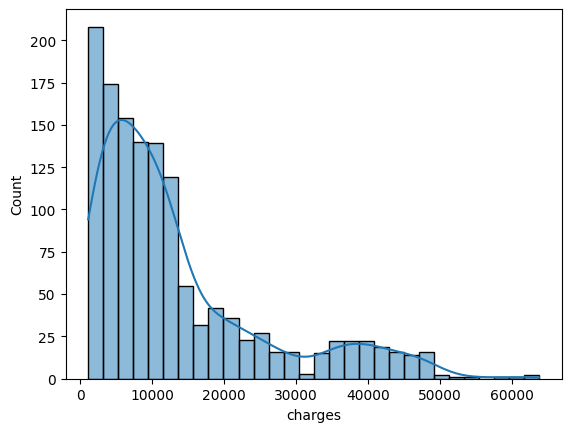

In [43]:
sns.histplot(df.charges,kde = True)

### Q8. Find the confidence interval for the mean of the age column. Only provide the lower limit of the interval rounded up to 2 decimal places.

In [45]:
lower,upper = st.norm.interval(confidence =0.95,loc=df.age.mean(),scale=st.sem(df.age))

In [47]:
lower = round(lower,2)
lower

38.45

### Q9. Calculate the Standard Error for the charges column. (Round up the final answer to 2 decimal places.)

In [48]:
se=round(st.sem(df.charges),2)
se

331.07

### Q10. Check the normality of the BMI column by using the Shapiro-Wilk test. If it is a normal distribution provide an answer as “Normal Distribution” else provide the answer as ”Not A Normal Distribution”.

In [50]:
w,p = st.shapiro(df.bmi)

In [51]:
if p<0.05:
    print("not normal distribution")
else:
    print("normal distribution")

not normal distribution
